<a href="https://colab.research.google.com/github/Mojtaba-Alehosseini/CS-SBU-eAdvancedAlgorithms-MSc-2023/blob/401422018/Assignments/Homework/401422018/Project/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 76.4 MB/s eta 0:00:00


In [3]:
import numpy as np
from pulp import *
import pandas as pd

In [9]:
# Read the foods.csv file using pandas
df = pd.read_csv('foods.csv')
foods_data = df.to_dict(orient='records')

# Create the Foods dictionary
Foods = {food['Food']:{key: food[key] for key in ['Cals', 'Carbs', 'Fat', 'Protein', 'VitaminB12', 'Iron', 'Calcium', 'Potassium', 'Na', 'Time', 'Cost']} for food in foods_data}

# Map the variable names to food names
food_names = df['Food'].tolist()
VarToFood = {f'x_{i}': food for i, food in enumerate(food_names)}


At first I defines a function called `DailyNeeds` that calculates daily calorie needs and macronutrient distribution based on gender, age, weight, height, activity level, and goal.

Here's a breakdown of what the code does:

1. The function `DailyNeeds` takes six parameters: `gender`, `age`, `weight`, `height`, `activity`, and `goal`.

2. It assigns an activity factor based on the provided `activity` parameter. The activity factor represents the level of physical activity and is used to calculate the daily calorie needs. The possible activity levels are: "sedentary", "lightly active", "moderately active", "very active", and "extra active". The corresponding activity factors are 1.2, 1.375, 1.55, 1.725, and 1.9, respectively.

3. It checks the `gender` parameter to determine the formula for calculating calories. If the gender is male (`'m'`, `'male'`, or `'man'`), it uses the formula `(10 * weight + 6.25 * height - 5 * age + 5) * activity_factor`. If the gender is female (`'f'`, `'female'`, `'woman'`, or `'w'`), it uses the formula `(10 * weight + 6.25 * height - 5 * age - 161) * activity_factor`.

4. It checks the `goal` parameter to determine the macronutrient distribution. If the goal is to "LoseFat", it calculates a new calorie value as 85% of the original calories. The macronutrient distribution is set to 30% carbohydrates, 30% fat, and 40% protein of the new calorie value. If the goal is to "GainMuscle", it calculates a new calorie value as 115% of the original calories. The macronutrient distribution is set to 40% carbohydrates, 30% fat, and 30% protein of the new calorie value. If the goal is to "Preserve" (maintain current weight), the new calorie value remains the same as the original calories. The macronutrient distribution is set to 50% carbohydrates, 25% fat, and 25% protein of the original calorie value.

5. The function returns the new calorie value, carbohydrates in grams (carbs_c) divided by 4 (since there are 4 calories per gram of carbohydrates), fat in grams (fat_c) divided by 9 (since there are 9 calories per gram of fat), and protein in grams (protein_c) divided by 4 (since there are 4 calories per gram of protein).

In summary, the code calculates the daily calorie needs and macronutrient distribution based on the provided parameters, such as gender, age, weight, height, activity level, and goal.

In [4]:
def DailyNeeds(gender,age,weight,height,activity,goal):
    #Activity: sedentary, lightly active, moderately active, very active, extra active
    #Goals:LoseFat,GainMuscle,Preserve
    if activity=='sedentary':
        activity_factor=1.2
    elif activity=='lightly active':
        activity_factor=1.375
    elif activity=='moderately active':
        activity_factor=1.55
    elif activity=='very active':
        activity_factor=1.725
    elif activity=='extra active':
        activity_factor=1.9

    if gender=='m' or gender == 'male' or gender == 'man':
        calories= (10 * weight + 6.25 * height  - 5 * age  + 5)*activity_factor
    elif gender=='f' or gender=='female' or gender =='woman' or gender =='w':
        calories= (10 * weight + 6.25 * height  - 5 * age  - 161)*activity_factor

    if goal=='LoseFat':
        new_calories=calories*0.85
        carbs_c,fat_c,protein_c=0.30*new_calories,0.30*new_calories,0.40*new_calories
    elif goal=='GainMuscle':
        new_calories=calories*1.15
        carbs_c,fat_c,protein_c=0.40*new_calories,0.30*new_calories,0.30*new_calories
    elif goal=='Preserve':
        new_calories=calories
        carbs_c,fat_c,protein_c=0.5*calories,0.25*calories,0.25*calories
    return new_calories,carbs_c/4,fat_c/9,protein_c/4

Calculating daily need of calories, carbohydrate, fat and protein based on gender, age, weight, height, activity and goal.

Activity: sedentary, lightly active, moderately active, very active, extra active

Goals: LoseFat, GainMuscle, Preserve

In [6]:
new_calories,carbs,fat,protein =DailyNeeds('m',22,78,180,'moderately active','GainMuscle')
print(new_calories,carbs,fat,protein)

3208.4999999999995 320.84999999999997 106.94999999999999 240.63749999999996


Variables:

minB12, minI, maxI, minCa, maxCa, minK, maxK, minNa, maxNa, k: These variables store numerical values used in the code. Their purpose will become clear as we go through the code.

c1, c2, Amin, Amax: These variables are empty lists that will be populated with data from the 'Foods' dictionary.

bmin, bmax: These lists are initialized with some values. Their purpose will also become clear later.

keysmin, keysmax: These lists store specific keys that will be used to access data in the 'Foods' dictionary.

Code Execution:
1. Iterating over each key in the 'Foods' dictionary, the code appends the 'Cost' value of each food to the list 'c1' and the 'Time' value to the list 'c2'. This suggests that the 'Foods' dictionary contains information about various food items, and the code is collecting their cost and time values.

2. The code then performs two similar iterations over the 'keysmin' and 'keysmax' lists, which contain specific keys to access data in the 'Foods' dictionary. For each key, the code creates an empty list called 'row' and then iterates over each key in the 'Foods' dictionary. In each iteration, it appends the corresponding value

In [7]:
minB12,minI,maxI,minCa,maxCa,minK,maxK,minNa,maxNa,k=2.4,18,45,1200,2500,2000,4700,500,2300,40
c1,c2,Amin,Amax=[],[],[],[]
bmin=[new_calories,carbs,fat,protein,minB12,minI,minCa,minK,minNa]
bmax=[new_calories+k,maxI,maxCa,maxK,maxNa]

keysmin=['Cals','Carbs','Fat','Protein','VitaminB12','Iron','Calcium','Potassium','Na']
keysmax=['Cals','Iron','Calcium','Potassium','Na']
for key in Foods:
    c1.append(Foods[key]['Cost'])
    c2.append(Foods[key]['Time'])
for i in keysmin:
    row=[]
    for key in Foods:
        row.append(Foods[key][i])
    Amin.append(row)
for i in keysmax:
    row=[]
    for key in Foods:
        row.append(Foods[key][i])
    Amax.append(row)

Now solves a linear programming problem with multiple objectives and constraints. It performs multiple iterations to find the best solutions.

1. A new linear programming problem named "DietPlanTime" is created with the objective of minimizing a certain quantity related to time. The problem is represented by the variable `prob`.

2. The variable `COLS` is defined as a range representing the number of columns in the matrix `Amin`.

3. Decision variables are created using `LpVariable.dicts()`. The variables 'x' and 'x_chosen' are created with the same indices as `COLS`. 'x' variables are continuous with a lower bound of 0, while 'x_chosen' variables are binary (0 or 1) with a lower bound of 0 and an upper bound of 1.

4. The objective function is defined as `prob += lpSum(c1[j] * x[j] for j in COLS), "obj"`. It aims to minimize the sum of the product of `c1` and `x` variables.

5. Constraints are added to the problem using two for loops. The first loop iterates over the rows of the matrix `Amin` and adds constraints to ensure that the sum of the product of `Amin` and `x` variables is greater than or equal to `bmin[i]`. The constraint names are created using `keysmin[i]+'min'`.

6. The second loop iterates over the rows of the matrix `Amax` and adds constraints to ensure that the sum of the product of `Amax` and `x` variables is less than or equal to `bmax[i]`. The constraint names are created using `keysmax[i]+'max'`.

7. Additional constraints are set on specific variables using the `prob +=` syntax. For each variable `x[i]`, there are two constraints that link it to the corresponding `x_chosen[i]` variable. These constraints enforce a relationship where `x[i]` is greater than or equal to `x_chosen[i] * 0.50` and `x[i]` is less than or equal to `x_chosen[i] * 1e5`.

8. Another constraint is added using `prob += lpSum(x_chosen[j] for j in COLS) >= 6, 'Numberofdifferentfoods'`. This constraint ensures that at least 6 different food items are chosen.

9. Certain variables (`x[0]`, `x[6]`, `x[7]`, `x[15]`, `x[16]`, `x[17]`, `x[19]`) are assigned the category of 'Integer' instead of 'Continuous'. This means that these variables must take integer values in the solution.

10. The code then performs multiple iterations to find the best solutions. For each iteration:
    - The linear programming problem is solved using `prob.solve()`.
    - The status of the problem is printed using `LpStatus[prob.status]`.
    - The optimal values of the variables are printed. If a variable's value is greater than 0, it prints the food item name and its corresponding portion value.
    - The optimal values of the variables are stored in the `BestSolutions` list.
    - The upper bound of each variable is adjusted based on its current value to prevent the same solution from being found again in subsequent iterations.
    - An empty line is printed to separate the iterations.

11. After the iterations, the best solutions are stored in the `BestSolutions` list, which contains dictionaries representing the chosen food items and their portion values.

Note: The specific values

 and meanings of variables like `Amin`, `bmin`, `c1`, `keysmin`, etc., are not provided in the given code snippet.

In [8]:
prob = LpProblem("DietPlanTime", LpMinimize)
COLS = range(len(Amin[0]))

# decision variables are created
x = LpVariable.dicts('x', COLS, lowBound=0, cat='Continuous')
x_chosen = LpVariable.dicts("Chosen", COLS, 0, 1, cat='Integer')

# objective function (only considering c2)
prob += lpSum(c1[j] * x[j] for j in COLS), "obj"

# Constraints
for i in range(len(Amin)):
    prob += lpSum(Amin[i][j] * x[j] for j in COLS) >= bmin[i], keysmin[i] + 'min'

for i in range(len(Amax)):
    prob += lpSum(Amax[i][j] * x[j] for j in COLS) <= bmax[i], keysmax[i] + 'max'

for i in COLS:
    prob += x[i] >= x_chosen[i] * 0.50, 'chooseconstraintg' + str(i)
    prob += x[i] <= x_chosen[i] * 1e5, 'chooseconstraintl' + str(i)

prob += lpSum(x_chosen[j] for j in COLS) >= 6, 'Numberofdifferentfoods'

x[0].cat = 'Integer'
x[6].cat = 'Integer'
x[7].cat = 'Integer'
x[15].cat = 'Integer'
x[16].cat = 'Integer'
x[17].cat = 'Integer'
x[19].cat = 'Integer'

BestSolutions = []
for i in range(7):
    prob.solve()
    Solution = []
    print("Status:", LpStatus[prob.status])

    # Optimal variables values
    for v in prob.variables():
        if v.name[0] != 'C':
            if v.varValue > 0:
                print(f'{VarToFood[v.name]} = {v.varValue:5.2f} portions')
                Solution.append({VarToFood[v.name]: v.varValue})
    BestSolutions.append(Solution)

    for v in prob.variables():
        if v.name[0] != 'C':
            if v.varValue > 0:
                v.upBound = v.varValue - 0.000003 * v.varValue

    print('\n')

Status: Optimal
Milk1.7% =  2.31 portions
Pork =  1.34 portions
Spaghetti =  1.35 portions
Bread =  1.00 portions
Beans =  3.00 portions
Chicken =  3.09 portions


Status: Optimal
Milk1.7% =  2.17 portions
Pork =  1.13 portions
Spaghetti =  1.31 portions
Beans =  3.00 portions
Potatoes =  0.50 portions
Yoghurt5% =  0.50 portions
Chicken =  3.07 portions


Status: Optimal
Milk1.7% =  2.17 portions
Pork =  0.95 portions
Fish =  0.50 portions
Spaghetti =  1.31 portions
Bread =  1.00 portions
Beans =  3.00 portions
Brocoli =  0.61 portions
Chicken =  3.04 portions


Status: Optimal
Milk1.7% =  2.17 portions
Pork =  0.95 portions
Spaghetti =  0.88 portions
Bread =  1.00 portions
Beans =  3.00 portions
Brocoli =  0.58 portions
Orange =  2.00 portions
Chicken =  3.04 portions
Beef =  0.55 portions


Status: Optimal
Eggs =  4.00 portions
Milk1.7% =  2.17 portions
Pork =  0.95 portions
Spaghetti =  0.88 portions
Rice =  1.24 portions
Bread =  1.00 portions
Beans =  2.00 portions
Cereal =  0.95 

This code will create a bar graph showing the food names on the x-axis and the corresponding optimal portion values on the y-axis.

In [10]:
import matplotlib.pyplot as plt

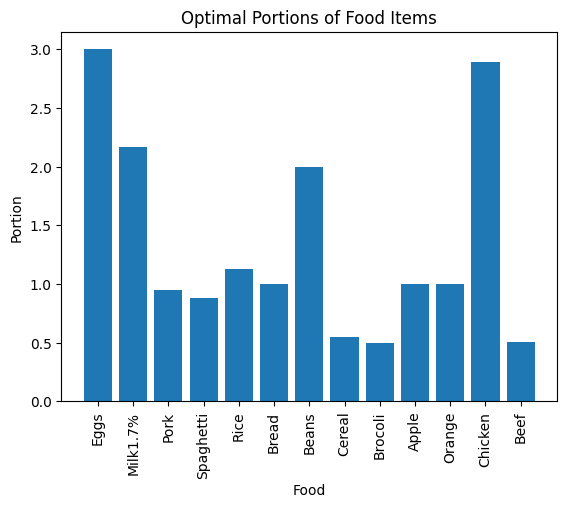

In [11]:
# Extract the food names and portion values from the solution
food_names = [list(solution.keys())[0] for solution in Solution]
portions = [list(solution.values())[0] for solution in Solution]

# Create a bar graph
plt.bar(food_names, portions)
plt.xlabel('Food')
plt.ylabel('Portion')
plt.title('Optimal Portions of Food Items')
plt.xticks(rotation=90)

# Display the graph
plt.show()
